In [1]:
import numpy                 as     np
import numpy.linalg          as     npl                 
import scipy                 as     sp
from   scipy                 import ndimage    as ndi

from   skimage               import data
from   skimage.util          import img_as_float
from   skimage.filters       import gabor_kernel
from   sklearn.preprocessing import scale

from   numbers               import Number   

import os, sys, math, itertools, collections

%matplotlib notebook
#%gui qt
import matplotlib
import matplotlib.pyplot     as     plt

import neuropythy            as     neuro
import neuropythy.freesurfer as     nfs

for p in ['/mnt/WinawerAcadia/Freesurfer_subjects']:
    if p not in nfs.subject_paths():
        nfs.add_subject_path(p)

import sco

def reload_sco():
    reload(sys.modules['sco.core'])
    reload(sys.modules['sco.anatomy.core'])
    reload(sys.modules['sco.stimulus.core'])
    reload(sys.modules['sco.pRF.core'])
    reload(sys.modules['sco.normalization.core'])
    reload(sys.modules['sco.anatomy'])
    reload(sys.modules['sco.stimulus'])
    reload(sys.modules['sco.pRF'])
    reload(sys.modules['sco.normalization'])
    reload(sys.modules['sco'])
    import sco

In [14]:
results = sco.calc_sco(
    subject='test-sub',
    max_eccentricity=10,
    stimulus_image_filenames=["/home/billbrod/Pictures/My Wallpapers/Taigu -Wubian Temple.JPG"],
    stimulus_pixels_per_degree=10)

In [4]:
@sco.calculates('pRF_sizes')
def calc_simple_pRF_sizes(pRF_v123_labels):
    return {'pRF_sizes': [0.5*l for l in pRF_v123_labels]}

new_anat = sco.calc_chain(
    sco.calc_anatomy.calc_layers,
    calc_pRF_sizes=calc_simple_pRF_sizes)
new_sco  = sco.calc_chain(
    sco.calc_sco.calc_layers,
    calc_anatomy=new_anat)

simple_results = new_sco(
    subject='test-sub',
    max_eccentricity=10,
    stimulus_image_filenames=["/home/billbrod/Pictures/My Wallpapers/Taigu -Wubian Temple.JPG"],
    stimulus_pixels_per_degree=10)

ValueError: Expected arguments missing: ('Kay2013_output_nonlinearity',)

In [5]:
reload_sco()
import sco.anatomy
exval = sco.export_predicted_responses(
    results,
    export_path='/home/billbrod/Desktop')

In [16]:
results=sco.export_predicted_responses(results,export_path='/home/billbrod/Desktop')

In [12]:
import nibabel.freesurfer.mghformat as fsmgh

pred = fsmgh.load('/home/billbrod/Desktop/prediction_0000.mgz')
img  = pred.dataobj.get_unscaled()

<IPython.core.display.Javascript object>


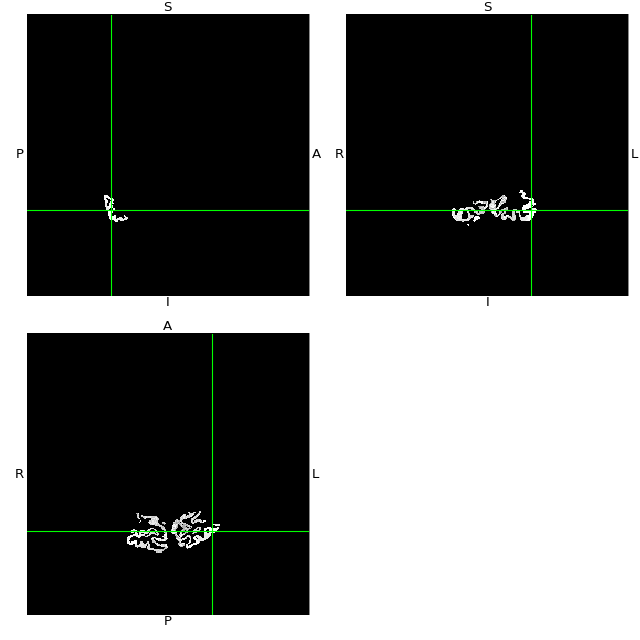

In [13]:
import nibabel.viewers

f = nibabel.viewers.OrthoSlicer3D(img, affine=pred.affine)
f.cmap = plt.get_cmap('gray')
f.clim = (0,0.3)
f.show()